In [ ]:
import numpy as np
import pandas as pd

from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(f'PATH/outlier_cross_validation.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
data.head()

,id,created_at,outLierModel,removedSample,modelName,selectedFeatures,fullResult,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_roc_auc,train_roc_auc,test_precision,train_precision
0,1,2022-06-14 23:08:37,all,0,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":72.4308316708,""score_time"":0.2373...",384.103967,1.244999,0.986438,0.994459,0.983627,0.993315,0.980933,0.990139,0.997390,0.999671,0.986338,0.996511
1,2,2022-06-14 23:28:07,ee_01,994,ab,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":76.3616223335,""score_time"":0.5469...",337.152588,2.287832,0.979350,0.979500,0.975162,0.975354,0.969167,0.969528,0.996091,0.996480,0.981236,0.981250
2,3,2022-06-14 23:08:37,iso_1,9940,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":81.3342685699,""score_time"":0.4429...",335.994053,1.454808,0.986966,0.995406,0.983318,0.994120,0.980119,0.990860,0.997144,0.999772,0.986538,0.997402
3,4,2022-06-14 23:08:37,ee_01,994,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":73.7992882729,""score_time"":0.2599...",335.819170,1.392217,0.986108,0.994431,0.983356,0.993326,0.980568,0.990052,0.997462,0.999699,0.986162,0.996621
4,5,2022-06-14 23:08:37,lof,2679,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":74.1212406158,""score_time"":0.2135...",355.707554,1.365439,0.986538,0.994533,0.983266,0.993207,0.979720,0.989771,0.997342,0.999677,0.986839,0.996668


In [ ]:
df10=data.loc[data.outLierModel!="iso_1"].groupby(by=['outLierModel','modelName']).agg(TOTAL=("test_recall","mean")).reset_index()
df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='outLierModel', values='TOTAL')
df10.reset_index(inplace=True)
df10.columns=["model","All","EE-1%","EE-5%","ISO-1%","ISO-5%","LOF","OC-SVM-1%","OC-SVM-5%"]
df10.head(15)

,model,All,EE-1%,EE-5%,ISO-1%,ISO-5%,LOF,OC-SVM-1%,OC-SVM-5%
0,ab,96.89,96.92,96.76,96.87,96.80,96.93,96.74,96.76
1,bc_100,97.98,97.96,97.94,97.95,97.88,97.98,97.88,97.87
2,dt,97.29,97.17,97.00,97.27,97.05,97.18,97.00,97.09
3,et_100,97.94,97.98,97.83,97.95,97.82,97.85,97.86,97.87
4,et_500,97.97,97.95,97.82,97.95,97.81,97.88,97.87,97.90
5,gn,79.01,79.86,80.21,78.88,78.34,78.96,82.36,82.69
6,knn3,97.12,97.11,97.00,97.06,97.00,97.14,97.01,97.00
7,knn5,97.11,97.09,96.95,97.11,96.90,97.11,97.00,97.02
8,lr,85.82,85.87,88.03,89.00,94.82,85.94,85.96,90.45
9,rf_100,98.09,98.06,97.92,98.04,97.92,98.05,98.00,97.98


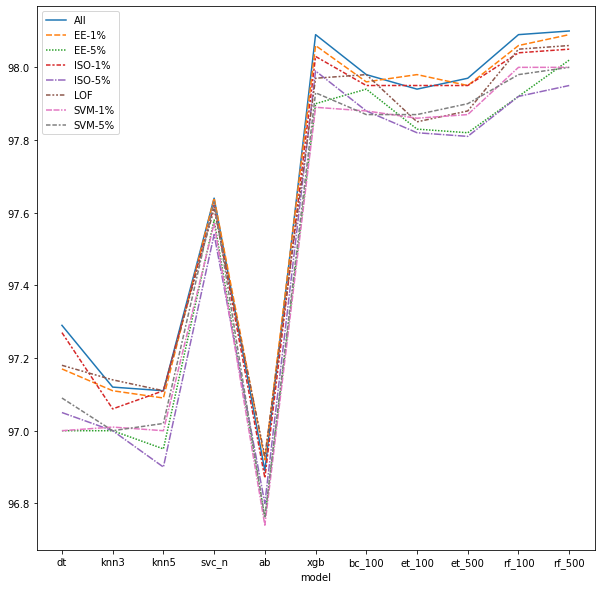

In [ ]:
df10_A=df10.loc[~df10.model.isin(["lr","gn"])]
df10_A.set_index('model',inplace=True)
df10_A=df10_A.reindex(['dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])


fig, ax = plt.subplots(figsize=(10, 10))

ax=sns.lineplot(data=df10_A,markers=False, dashes=True,ax=ax)
ax.set_xticks(range(len(df10_A)))
ax.set_xticklabels(df10_A.index)
sns.set_context("poster",font_scale=0.5)


plt.show()

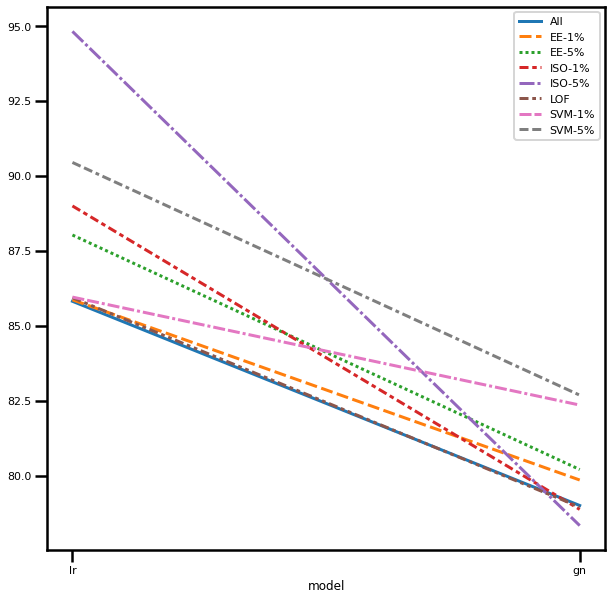

In [ ]:
df10_B=df10.loc[df10.model.isin(["lr","gn"])]
df10_B.set_index('model',inplace=True)
df10_B=df10_B.reindex(["lr","gn"])


fig, ax = plt.subplots(figsize=(10, 10))

ax=sns.lineplot(data=df10_B,markers=False, dashes=True,ax=ax)
ax.set_xticks(range(len(df10_B)))
ax.set_xticklabels(df10_B.index)
sns.set_context("poster",font_scale=0.5)


plt.show()

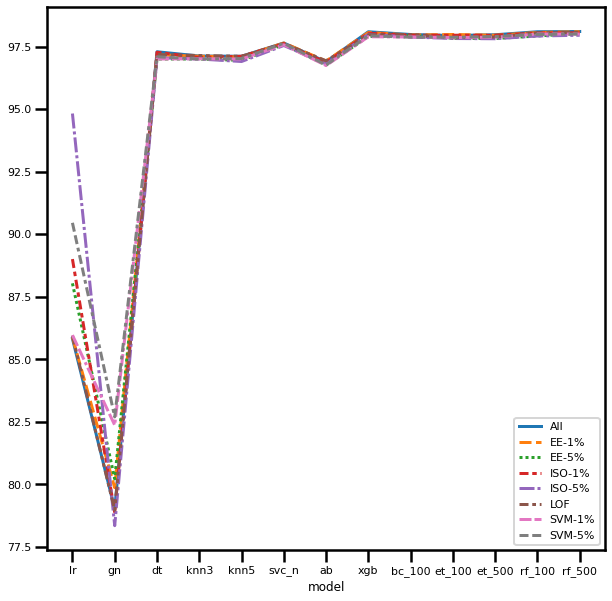

In [ ]:
df10.set_index('model',inplace=True)
df10=df10.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])


fig, ax = plt.subplots(figsize=(10, 10))

ax=sns.lineplot(data=df10,markers=False, dashes=True,ax=ax)
ax.set_xticks(range(len(df10)))
ax.set_xticklabels(df10.index)
sns.set_context("poster",font_scale=0.5)


plt.show()

In [ ]:
df10=data.loc[data.outLierModel!="iso_1"].groupby(by=['outLierModel','modelName']).agg(TOTAL=("test_recall","mean")).reset_index()
df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='outLierModel', values='TOTAL')
df10.reset_index(inplace=True)
df10.columns=["model","None","EE-1%","EE-5%","ISO-1%","ISO-5%","LOF","OC-SVM-1%","OC-SVM-5%"]

df10_A=df10.loc[~df10.model.isin(["lr","gn"])]

df10_A.set_index('model',inplace=True)
df10_A=df10_A.reindex(['dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
df10_A.rename(index={'dt':'DT','knn3':'KNN-3','knn5':'KNN-5','svc_n':'SVM','ab':'AB','xgb':'XGB','bc_100':'BC-100','et_100':'ET-100','et_500':'ET-500','rf_500':'RF-100','rf_100':'RF-500'},inplace=True)


df10_B=df10.loc[df10.model.isin(["lr","gn"])]

df10_B.set_index('model',inplace=True)
df10_B=df10_B.reindex(["lr","gn"])
df10_B.rename(index={'lr':'LR','gn':'GN'},inplace=True)

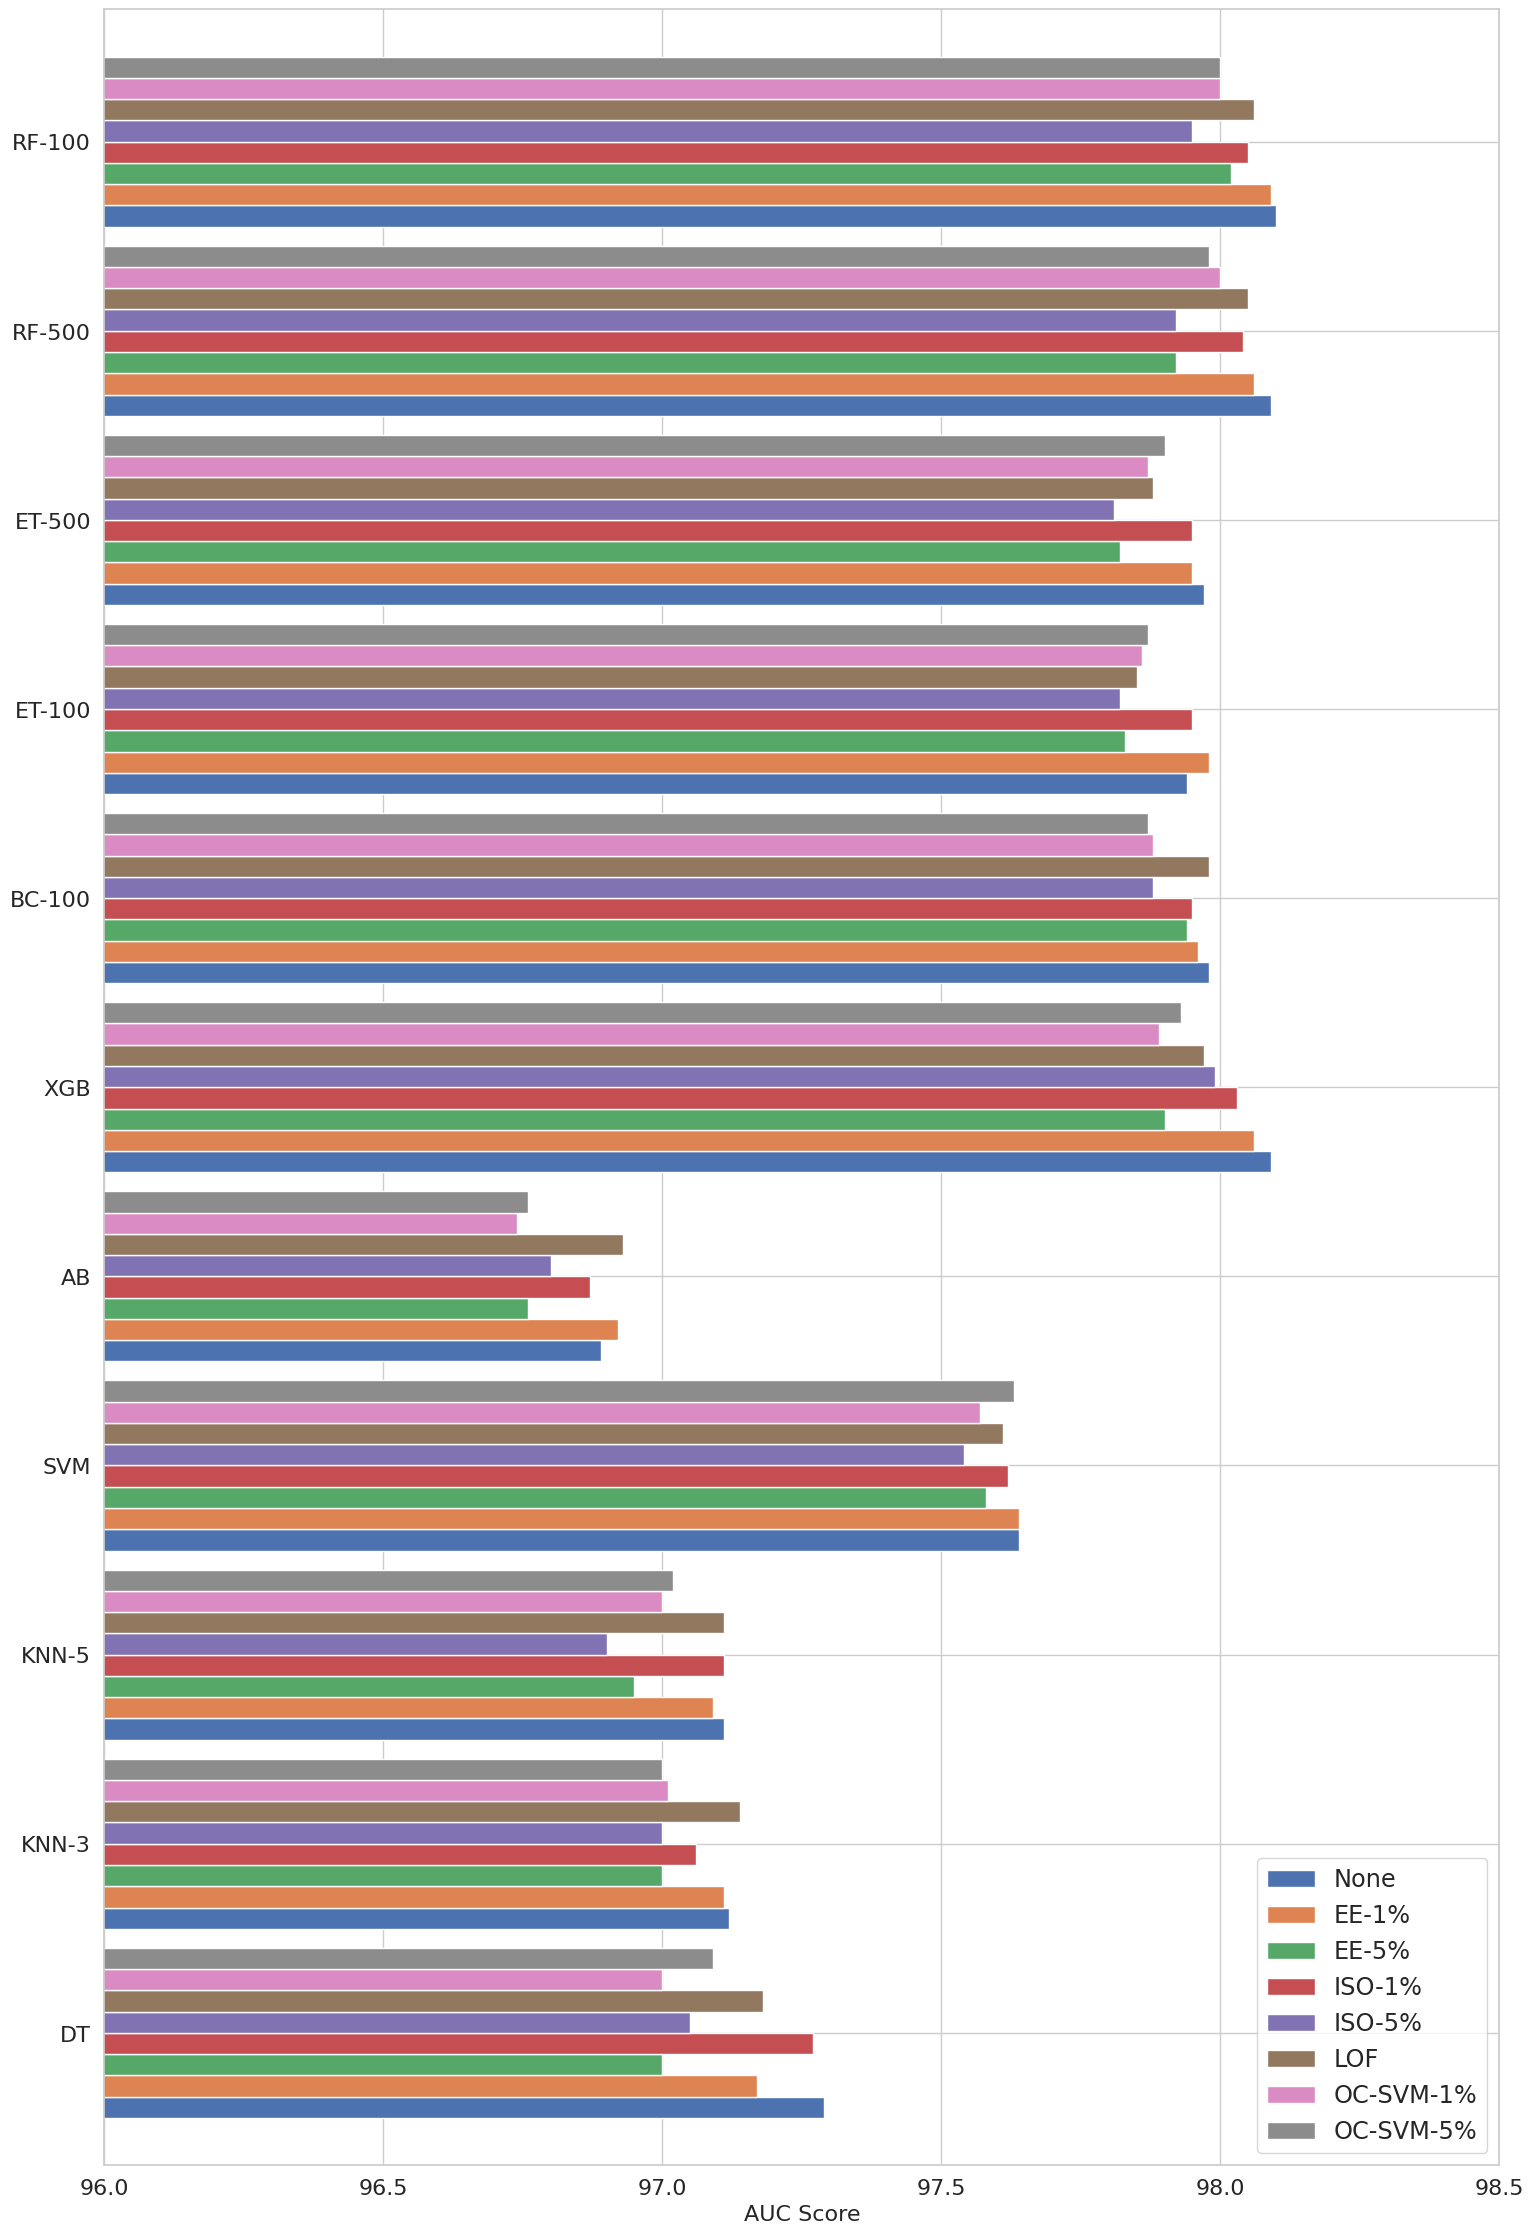

In [ ]:
fig, ax = plt.subplots(figsize=(18, 28))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



sns.set(style="whitegrid")

df10_A.plot(kind="barh",ax=ax,width=0.9)


#  bbox_to_anchor=(1.18, 1.02)
ax.legend(loc="lower right",fontsize='x-large')

ax.set_xlim([96, 98.5])




plt.xlabel('AUC Score',size=16)
plt.ylabel('',size = 16)

plt.show()

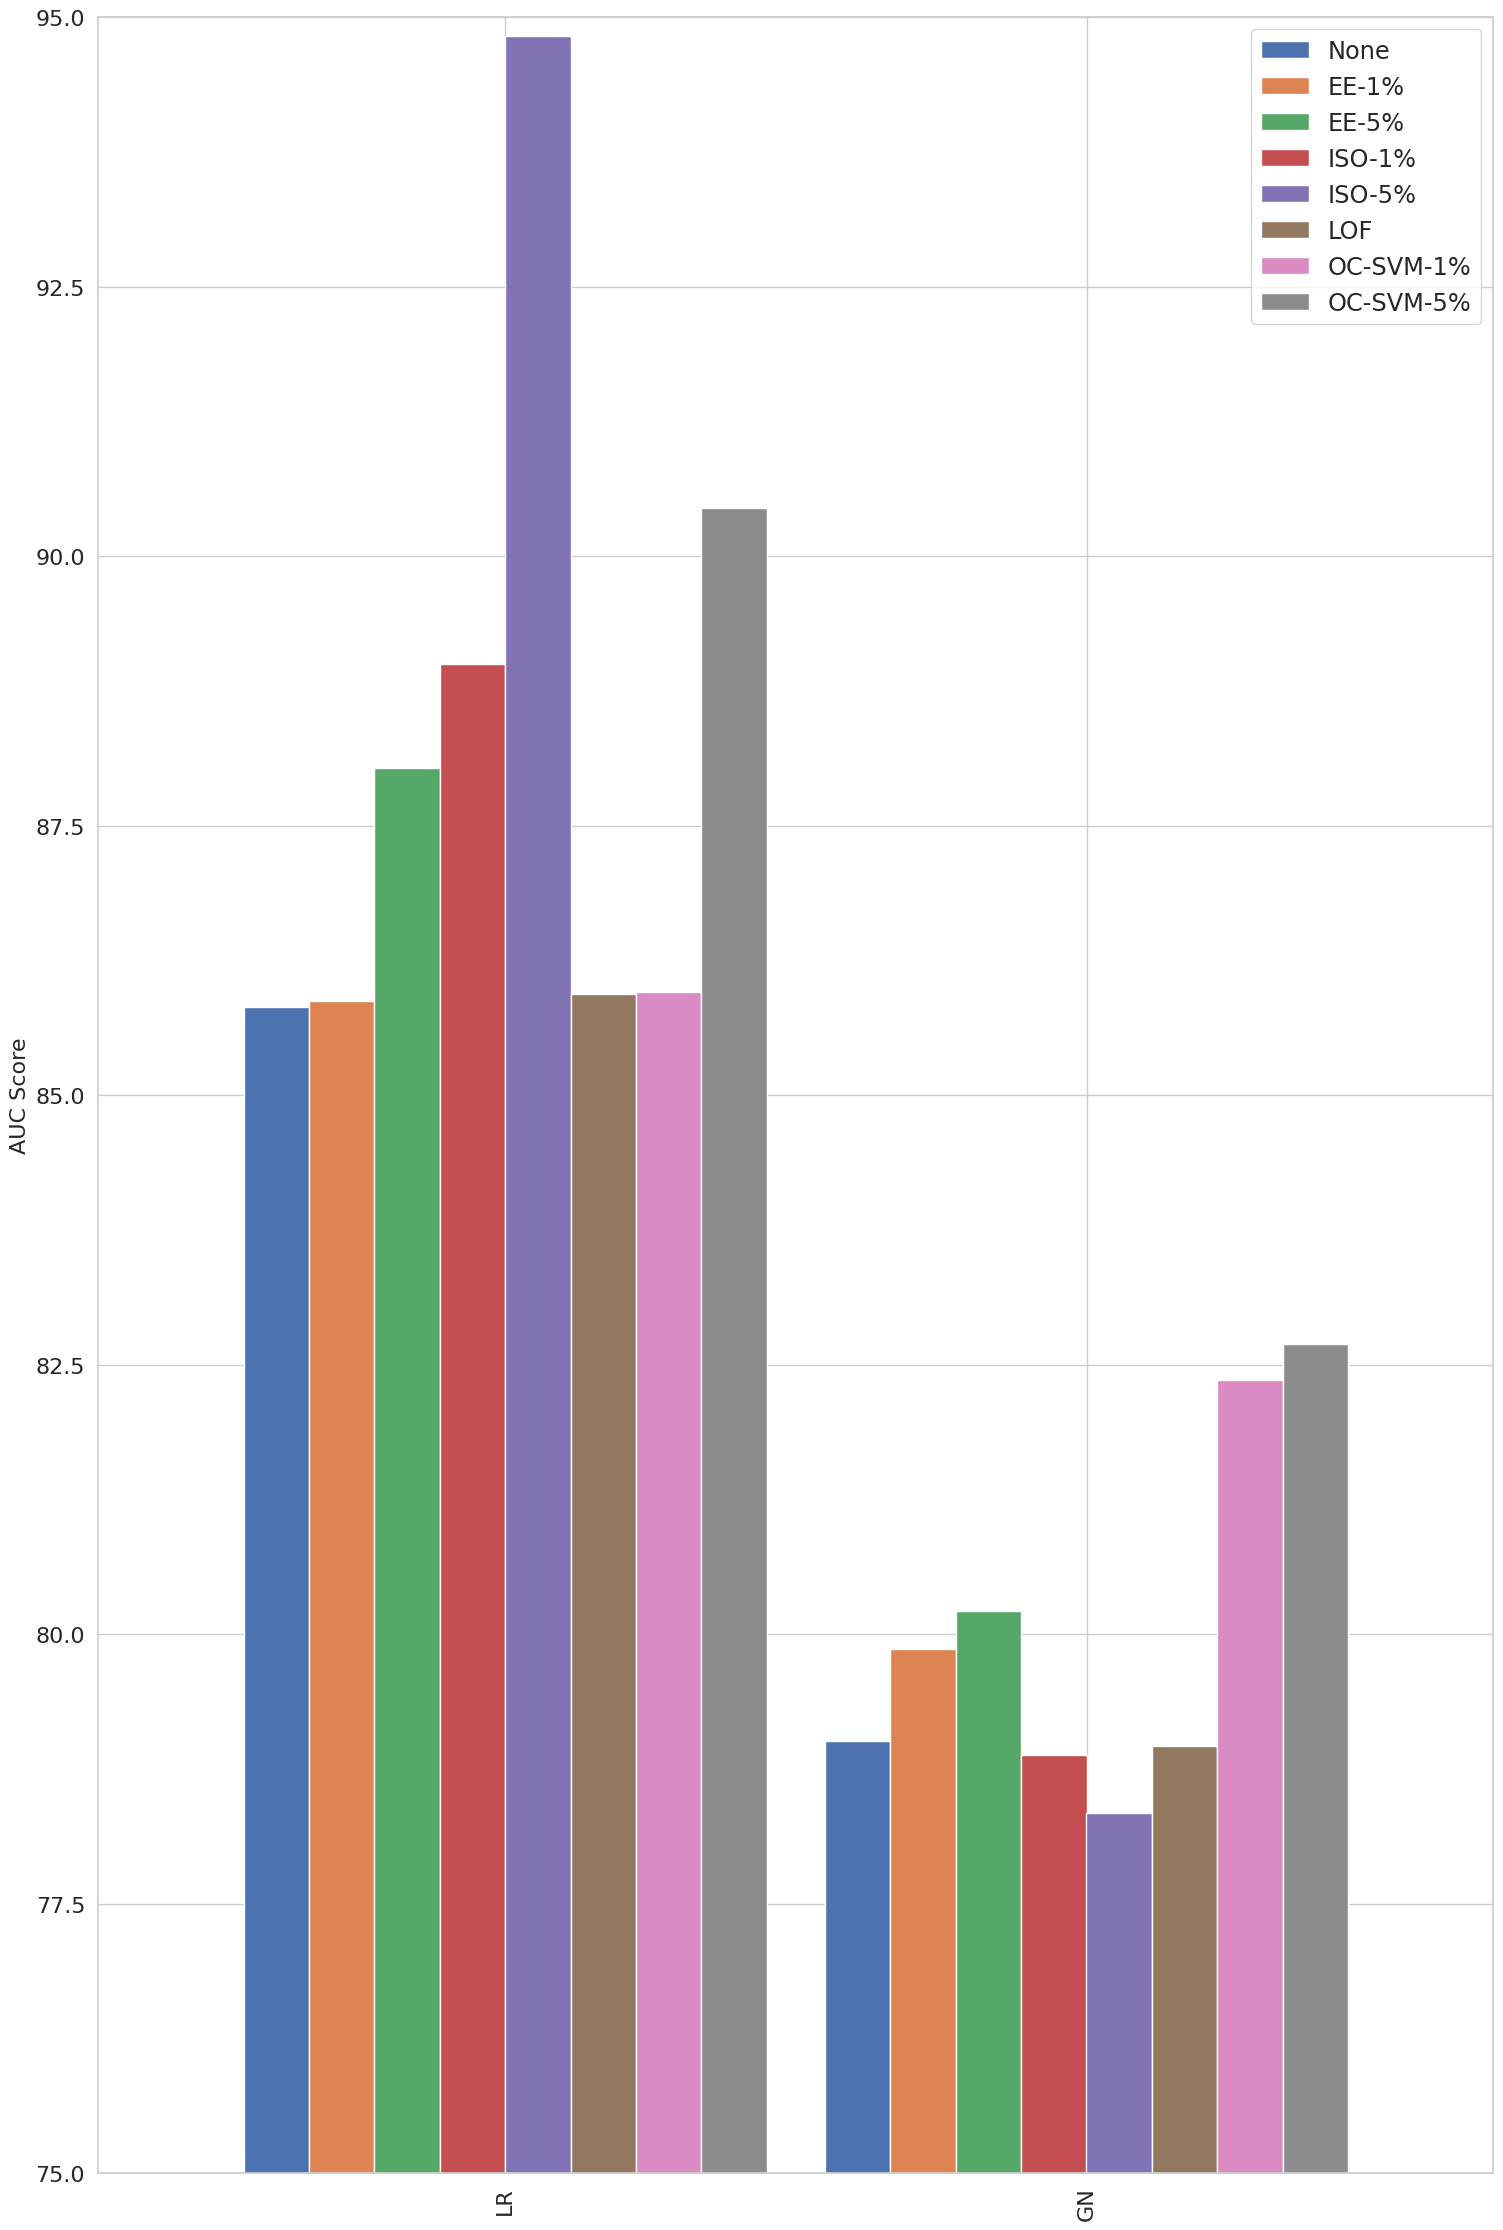

In [ ]:
fig, ax = plt.subplots(figsize=(18, 28))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

sns.set(style="whitegrid")
df10_B.plot(kind="bar",ax=ax,width=0.9)

# bbox_to_anchor=(1.18, 1.02),
ax.legend(loc="upper right", fontsize='x-large')

ax.set_ylim([75, 95])

plt.ylabel('AUC Score',size=16)
plt.xlabel('',size = 16)

plt.show()